In [170]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas as pd
import pickle
import mlcolvar

## COLVAR 

In [171]:
df = pd.read_csv('calixarene/COLVAR_G2_WITH_TICA.csv',index_col=0)

df['time_ns'] = df['time']/1000
#df = df.rolling(10).mean()
df = df.dropna(subset=['TICA-1','TICA-2']).reset_index()

df


,index,time,@3,cyl.x,cyl.y,cyl.z,radius,funnel,funnelwall.bias,funnelwall.force2,...,upper_wall.force2,ang,cosang,walker,ang_deg,TICA-1,TICA-2,TICA-1-transfer,TICA-2-transfer,time_ns
0,0,0.0,0.0212,-0.6228,0.1409,1.8035,0.6386,0.4386,384.7213,3.077770e+06,...,799.1801,2.1593,-0.5551,0,123.718777,-0.258114,-1.537376,-0.032767,1.111633,0.00
1,1,10.0,0.0146,-0.0652,-0.1821,1.6937,0.1934,-0.0066,0.0000,0.000000e+00,...,0.0000,2.2792,-0.6506,0,130.588541,-0.259255,-1.538749,-0.003086,1.175197,0.01
2,2,20.0,0.0165,-0.0049,-0.1908,1.4590,0.1909,-0.0091,0.0000,0.000000e+00,...,0.0000,2.4698,-0.7827,0,141.509116,-0.207403,-1.014161,-0.083171,1.130071,0.02
3,3,30.0,0.0183,0.1428,0.0985,1.7830,0.1735,-0.0265,0.0000,0.000000e+00,...,0.0000,2.8652,-0.9621,0,164.163867,-0.258171,-1.537473,-0.011335,1.153291,0.03
4,4,40.0,0.0195,-0.0992,-0.1938,1.5554,0.2177,0.0177,0.6249,4.999305e+03,...,0.0000,2.1040,-0.5083,0,120.550320,-0.257887,-1.537436,-0.008644,1.263750,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64104,64558,99450.0,0.0151,0.0217,0.0032,0.6399,0.0219,-0.5381,0.0000,0.000000e+00,...,0.0000,3.0689,-0.9974,9,175.835018,0.586410,0.033477,0.112055,-0.034927,99.45
64105,64559,99460.0,0.0186,-0.0270,-0.0372,0.6306,0.0459,-0.5235,0.0000,0.000000e+00,...,0.0000,2.8537,-0.9588,9,163.504966,0.582540,0.033939,0.114929,-0.035597,99.46
64106,64560,99470.0,0.0136,0.0071,0.1009,0.5385,0.1011,-0.5603,0.0000,0.000000e+00,...,0.0000,2.8634,-0.9616,9,164.060735,0.525472,0.040077,0.068156,-0.038878,99.47
64107,64561,99480.0,0.0205,0.0946,0.0078,0.6389,0.0949,-0.4662,0.0000,0.000000e+00,...,0.0000,2.8780,-0.9655,9,164.897253,0.593283,0.032643,0.117135,-0.036985,99.48


In [173]:
# Normalize min-max
def normalize_minmax(y, mask = None):
    if mask is not None:
        y2 = y[mask]
    else:
        y2 = y
    return 2 * (y - y2.min()) / (y2.max() - y2.min()) - 1

# normalize according to mean and standard deviation
def normalize(y):
    return (y - y.mean()) / y.std()

df['TICA-1'] = normalize(df['TICA-1']) 
df['TICA-2'] = normalize_minmax(df['TICA-2']) 
df['TICA-1-transfer'] = normalize(df['TICA-1-transfer'])    
df['TICA-2-transfer'] = normalize_minmax(df['TICA-2-transfer'])
df['TICA-2-transfer'] = df['TICA-2-transfer'] * -1

df

,index,time,@3,cyl.x,cyl.y,cyl.z,radius,funnel,funnelwall.bias,funnelwall.force2,...,upper_wall.force2,ang,cosang,walker,ang_deg,TICA-1,TICA-2,TICA-1-transfer,TICA-2-transfer,time_ns
0,0,0.0,0.0212,-0.6228,0.1409,1.8035,0.6386,0.4386,384.7213,3.077770e+06,...,799.1801,2.1593,-0.5551,0,123.718777,-0.919547,-0.996667,-1.099206,0.757138,0.00
1,1,10.0,0.0146,-0.0652,-0.1821,1.6937,0.1934,-0.0066,0.0000,0.000000e+00,...,0.0000,2.2792,-0.6506,0,130.588541,-0.922125,-0.998384,-0.678795,0.851826,0.01
2,2,20.0,0.0165,-0.0049,-0.1908,1.4590,0.1909,-0.0091,0.0000,0.000000e+00,...,0.0000,2.4698,-0.7827,0,141.509116,-0.804975,-0.342409,-1.813130,0.784604,0.02
3,3,30.0,0.0183,0.1428,0.0985,1.7830,0.1735,-0.0265,0.0000,0.000000e+00,...,0.0000,2.8652,-0.9621,0,164.163867,-0.919675,-0.996788,-0.795638,0.819193,0.03
4,4,40.0,0.0195,-0.0992,-0.1938,1.5554,0.2177,0.0177,0.6249,4.999305e+03,...,0.0000,2.1040,-0.5083,0,120.550320,-0.919033,-0.996742,-0.757526,0.983738,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64104,64558,99450.0,0.0151,0.0217,0.0032,0.6399,0.0219,-0.5381,0.0000,0.000000e+00,...,0.0000,3.0689,-0.9974,9,175.835018,0.988505,0.967617,0.952088,-0.950825,99.45
64105,64559,99460.0,0.0186,-0.0270,-0.0372,0.6306,0.0459,-0.5235,0.0000,0.000000e+00,...,0.0000,2.8537,-0.9588,9,163.504966,0.979760,0.968194,0.992786,-0.951823,99.46
64106,64560,99470.0,0.0136,0.0071,0.1009,0.5385,0.1011,-0.5603,0.0000,0.000000e+00,...,0.0000,2.8634,-0.9616,9,164.060735,0.850825,0.975869,0.330295,-0.956711,99.47
64107,64561,99480.0,0.0205,0.0946,0.0078,0.6389,0.0949,-0.4662,0.0000,0.000000e+00,...,0.0000,2.8780,-0.9655,9,164.897253,1.004032,0.966574,1.024033,-0.953891,99.48


#### time series

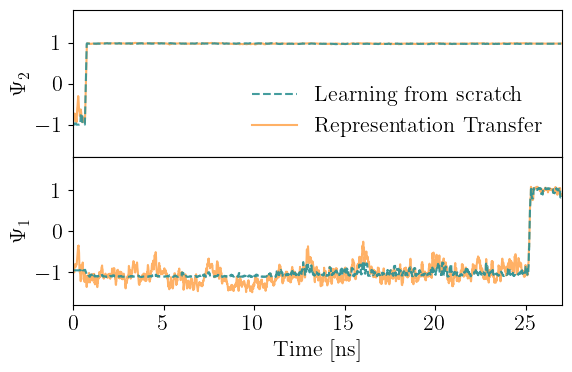

<Figure size 640x480 with 0 Axes>

In [167]:
# define 2 supplots
# set no spacing vertical between subplots

fig, axs = plt.subplots(2,1, figsize=(6, 4),sharex=True, gridspec_kw={"wspace": 0, "hspace": 0})

ev = 1

ax = axs[0]
df[df['walker']==6][::ev].plot('time_ns','TICA-2',linestyle='--',ax=ax, color='fessa1',alpha=0.9,label="Learning from scratch")
df[df['walker']==6][::ev].plot('time_ns','TICA-2-transfer',ax=ax, color='fessa5',alpha=0.9,label="Representation Transfer",zorder=0)

ax.legend(frameon=False,ncol=1)
ax.set_xlim(0,27)
ax.set_ylim(-1.8,1.8)
ax.set_ylabel(r'$\Psi_2$')

ax = axs[1]
df[df['walker']==6][::ev].plot('time_ns','TICA-1',linestyle='--',ax=ax, color='fessa1',alpha=0.95,label='scratch',legend=False)
df[df['walker']==6][::ev].plot('time_ns','TICA-1-transfer',ax=ax, color='fessa5',alpha=0.9,label='transfer',zorder=0,legend=False)

# turn off legend 
#ax.legend(frameon=False,ncol=2)
ax.set_ylim(-1.8,1.8)
ax.set_ylabel(r'$\Psi_1$')
ax.set_xlabel('Time [ns]')

#plt.suptitle('Ligand Binding')
plt.tight_layout()
plt.show()
plt.savefig('calixarene/traj.svg',dpi=300,bbox_inches='tight')

/tmp/ipykernel_2892057/3267552552.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


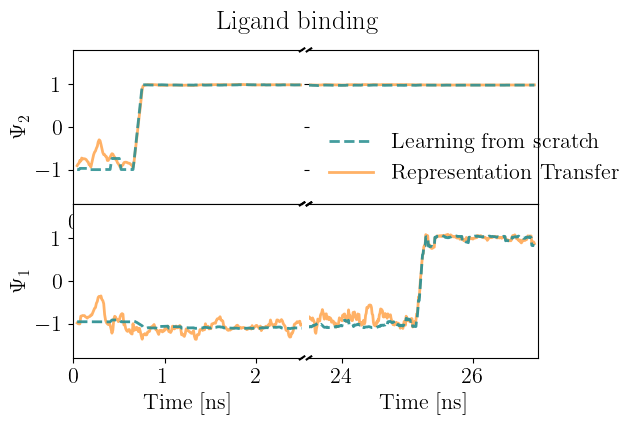

In [168]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# usetex for matplotlib
import matplotlib
from matplotlib import rc
rc('text', usetex=True)

# define subplot with fontsize 12 
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)

fig, axs = plt.subplots(2, 2, figsize=(6, 4), sharey='row',
                        gridspec_kw={"wspace": 0.03, "hspace": 0})  # 2 rows × 2 columns

ev = 1
xlims = [(0,2.5), (23.5, 27)]

lw=2
for i, xlim in enumerate(xlims):
    ax_top = axs[0][i]
    df[df['walker']==6][::ev].plot('time_ns','TICA-2', linestyle='--', ax=ax_top, color='fessa1', linewidth=lw, alpha=0.9, label="Learning from scratch")
    df[df['walker']==6][::ev].plot('time_ns','TICA-2-transfer', ax=ax_top, color='fessa5', alpha=0.9, linewidth=lw, label="Representation Transfer", zorder=0)
    ax_top.set_xlim(*xlim)
    ax_top.set_ylim(-1.8, 1.8)
    if i == 0:
        ax_top.get_legend().remove()
        ax_top.set_ylabel(r'$\Psi_2$')
        ax.tick_params(axis='y', right=False)
        ax_top.spines['right'].set_visible(False)  # remove inner right spine
    else:
        ax_top.legend(frameon=False)
        ax.tick_params(axis='y', left=False, right=False, labelleft=False)
        ax_top.spines['left'].set_visible(False)   # remove inner left spine

    ax_bot = axs[1][i]
    df[df['walker']==6][::ev].plot('time_ns','TICA-1', linestyle='--', ax=ax_bot, color='fessa1',linewidth=lw, alpha=0.95, legend=False)
    df[df['walker']==6][::ev].plot('time_ns','TICA-1-transfer', ax=ax_bot, color='fessa5', linewidth=lw,alpha=0.9, zorder=0, legend=False)
    ax_bot.set_xlim(*xlim)
    ax_bot.set_ylim(-1.8, 1.8)
    if i == 0:
        ax_bot.set_ylabel(r'$\Psi_1$')
        ax_bot.spines['right'].set_visible(False)
    else:
        ax_bot.tick_params(axis='y', left=False, right=False, labelleft=False)
        ax_bot.spines['left'].set_visible(False)
    ax_bot.set_xlabel('Time [ns]')

# Add diagonal break marks
d = 0.01
kwargs = dict(transform=axs[0][0].transAxes, color='k', clip_on=False)
axs[0][0].plot((1-d, 1+d), (-d, +d), **kwargs)
axs[0][0].plot((1-d, 1+d), (1-d, 1+d), **kwargs)
kwargs.update(transform=axs[0][1].transAxes)

axs[0][1].plot((-d, +d), (-d, +d), **kwargs)
axs[0][1].plot((-d, +d), (1-d, 1+d), **kwargs)

kwargs.update(transform=axs[1][0].transAxes)
axs[1][0].plot((1-d, 1+d), (-d, +d), **kwargs)
axs[1][0].plot((1-d, 1+d), (1-d, 1+d), **kwargs)
kwargs.update(transform=axs[1][1].transAxes)
axs[1][1].plot((-d, +d), (-d, +d), **kwargs)
axs[1][1].plot((-d, +d), (1-d, 1+d), **kwargs)

plt.tight_layout()
plt.suptitle('Ligand binding')
plt.savefig('calixarene/traj.svg', dpi=300, bbox_inches='tight')
plt.show()


#### 2d plot

/tmp/ipykernel_2892057/3825613737.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


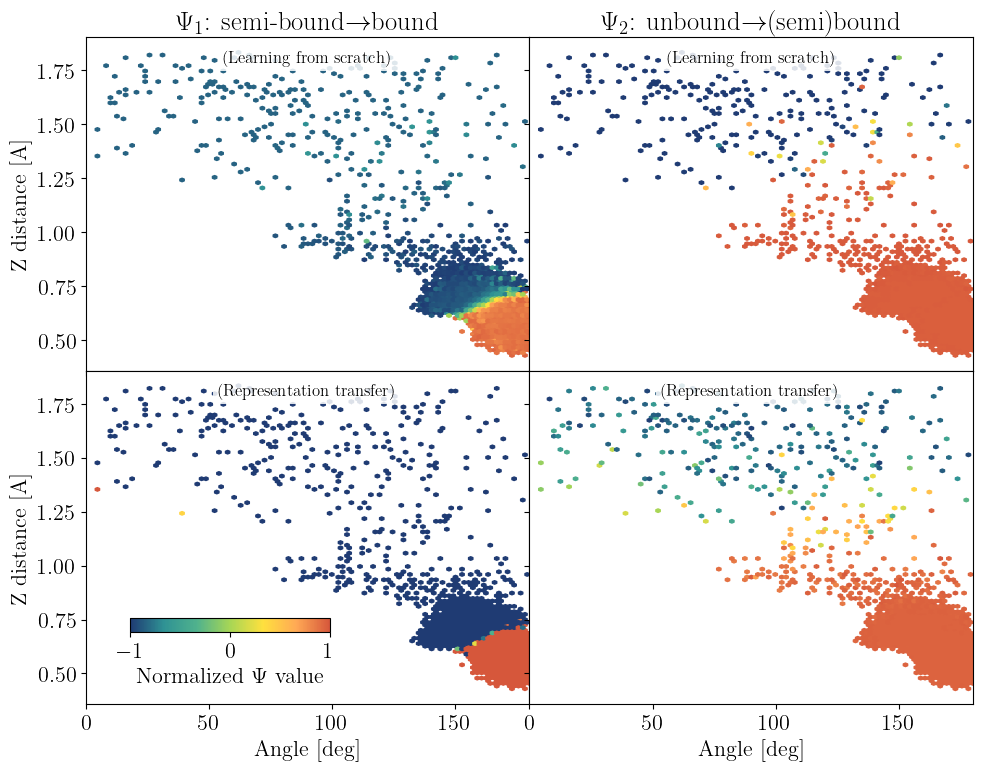

In [189]:
import matplotlib.pyplot as plt

labels = {'cyl.z' : 'Z distance [A]',
          'ang_deg' : 'Angle [deg]',
          'TICA-1' : '(Learning from scratch)',
          'TICA-2' : '(Learning from scratch)',
          'TICA-1-transfer' : '(Representation transfer)',
          'TICA-2-transfer' : '(Representation transfer)'}

titles = {'TICA-1': r'$\Psi_1$: semi-bound$\rightarrow$bound',
          'TICA-2': r'$\Psi_2$: unbound$\rightarrow$(semi)bound' }

fg, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True,
                       gridspec_kw={"wspace": 0, "hspace": 0})

normalize = True
df_sel = df.dropna(subset=['TICA-1', 'TICA-2'])

cols = ['TICA-1','TICA-2']
sign = [1, 1]
hexplots = []

for i, col in enumerate(cols):
    ax = axs[0][i]
    y = df_sel[col] * sign[i]
    if normalize:
        y = 2 * (y - y.min()) / (y.max() - y.min()) - 1
    pp = ax.hexbin(df_sel['ang_deg'], df_sel['cyl.z'], C=y, vmin=-1, vmax=1, cmap='fessa',label= labels[col])
    hexplots.append(pp)
    
    if i == 0:
        ax.set_ylabel(labels['cyl.z'])
    if i == 1:
        #ax.set_yticklabels([])  # Hide inner Y ticks
        ax.set_xlim(0,180)
    #ax.set_xticklabels([])      # Hide top row X ticks
    ax.set_title(titles[col])
    # add a legend with no border but filled with white color and remove the marker 
    #ax.legend(frameon=True,facecolor='white',edgecolor='none',loc='upper left')
    # add a text on the upper center of the plot on a white box
    ax.text(0.5, 0.94, labels[col], transform=ax.transAxes, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='none', alpha=0.85),fontsize=12)

cols = [ 'TICA-1-transfer','TICA-2-transfer']
sign = [1, -1]

for i, col in enumerate(cols):
    ax = axs[1][i]
    if col == 'TICA-1-transfer':
        mask = (df_sel[col] > -0.07) & (df_sel[col] < 0.14)
        y = df_sel[col] * sign[i]
        y2 = df_sel[mask][col] * sign[i]
    else:
        y = df_sel[col] * sign[i]
        y2 = y

    if normalize:
        y = 2 * (y - y2.min()) / (y2.max() - y2.min()) - 1
    pp = ax.hexbin(df_sel['ang_deg'], df_sel['cyl.z'], C=y, cmap='fessa', vmin=-1, vmax=1,label= labels[col])
    hexplots.append(pp)

    if i == 0:
        ax.set_ylabel(labels['cyl.z'])
    #else:
        #ax.set_yticklabels([])

    ax.set_xlabel(labels['ang_deg'])
    ax.text(0.5, 0.94, labels[col], transform=ax.transAxes, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='none', alpha=0.85),fontsize=12)

# Add a single colorbar to the right of all subplots
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#cbar = fg.colorbar(hexplots[0], ax=axs, orientation='horizontal', fraction=0.02, pad=0.02)
ax_cb = inset_axes(
    axs[1, 0],
    width="45%",        # 50% of the parent axis width
    height="4%",        # 5% of the parent axis height
    loc='lower left',   # anchored to the lower left corner
    bbox_to_anchor=(0.05, 0.15, 1, 1),  # full axes bbox as reference
    bbox_transform=axs[1, 0].transAxes,
    borderpad=1         # padding inside the axes
)

cbar = fg.colorbar(hexplots[2], cax=ax_cb, orientation='horizontal')
cbar.set_label(r"Normalized $\Psi$ value")

plt.savefig(f'calixarene/si-calixarene.svg',dpi=300,bbox_inches='tight')
plt.tight_layout()
plt.show()

## TIMESCALES

#### G13->G2 (traj, replicas)

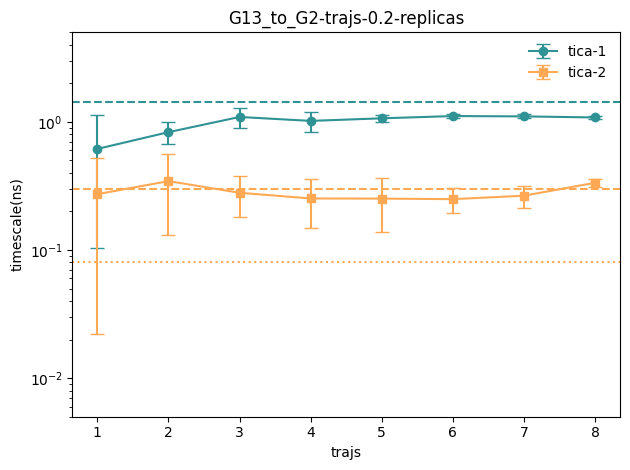

In [7]:
exp_name = "G13_to_G2-trajs-0.2-replicas"
with open(f'calixarene/{exp_name}.pkl', 'rb') as f:
    its_list = pickle.load(f)

# Convert to DataFrame
df = pd.DataFrame(its_list)

# Group by 'trajs' and calculate mean and std for 't1' and 't2'
stats = df.groupby('trajs').agg(['mean', 'std'])

# Plot
fig, ax = plt.subplots()

x = stats.index
t1_means = stats['t1']['mean']
t1_stds = stats['t1']['std']
t2_means = stats['t2']['mean']
t2_stds = stats['t2']['std']

# Plot with error bars
ax.errorbar(x, t1_means, yerr=t1_stds, fmt='o-', capsize=5, color='fessa1',label='tica-1')
ax.errorbar(x, t2_means, yerr=t2_stds, fmt='s-', capsize=5, color='fessa5',label='tica-2')


plt.axhline(0.3,linestyle='--',color='fessa5')
plt.axhline(0.08,linestyle='dotted',color='fessa5')
plt.axhline(1.43,linestyle='--',color='fessa1')

# Customize plot
ax.set_title(exp_name)
ax.set_xlabel('trajs')
ax.set_ylabel('timescale(ns)')
ax.set_yscale('log')
ax.set_ylim(5e-3,5)
ax.legend(frameon=False)

plt.tight_layout()
plt.show()

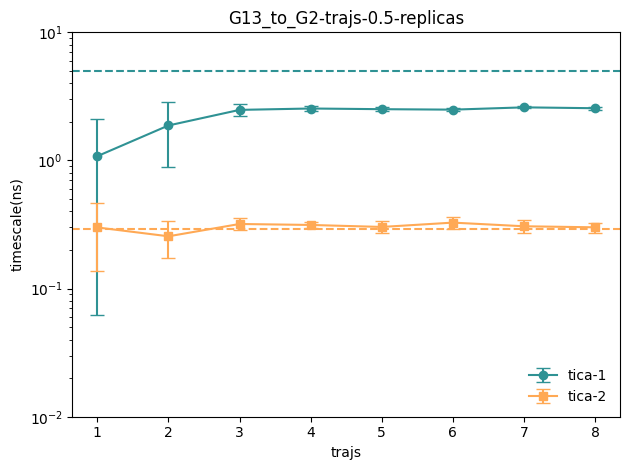

In [8]:
import pandas as pd

# Load
import pickle
exp_name = "G13_to_G2-trajs-0.5-replicas"
with open(f'calixarene/{exp_name}.pkl', 'rb') as f:
    its_list = pickle.load(f)

# Convert to DataFrame
df = pd.DataFrame(its_list)

# Group by 'trajs' and calculate mean and std for 't1' and 't2'
stats = df.groupby('trajs').agg(['mean', 'std'])

# Plot
fig, ax = plt.subplots()

x = stats.index
t1_means = stats['t1']['mean']
t1_stds = stats['t1']['std']
t2_means = stats['t2']['mean']
t2_stds = stats['t2']['std']

# Plot with error bars
ax.errorbar(x, t1_means, yerr=t1_stds, fmt='o-', capsize=5, color='fessa1',label='tica-1')
ax.errorbar(x, t2_means, yerr=t2_stds, fmt='s-', capsize=5, color='fessa5',label='tica-2')

plt.axhline(0.29,linestyle='--',color='fessa5')
plt.axhline(5.,linestyle='--',color='fessa1')

# Customize plot
ax.set_title(exp_name)
ax.set_xlabel('trajs')
ax.set_ylabel('timescale(ns)')
ax.set_yscale('log')
ax.set_ylim(1e-2,10)
ax.legend(frameon=False,loc='lower right')

plt.tight_layout()
plt.show()

#### G2 VS LAGTIME

100 0.7377442 0.039616708
200 1.4333175 0.079324864
300 2.1361618 0.11504924
500 3.4411683 0.20796476
1000 6.2962937 0.32915977
2000 10.762315 0.6799354
3000 13.987491 0.7650495
5000 18.798605 1.1794372


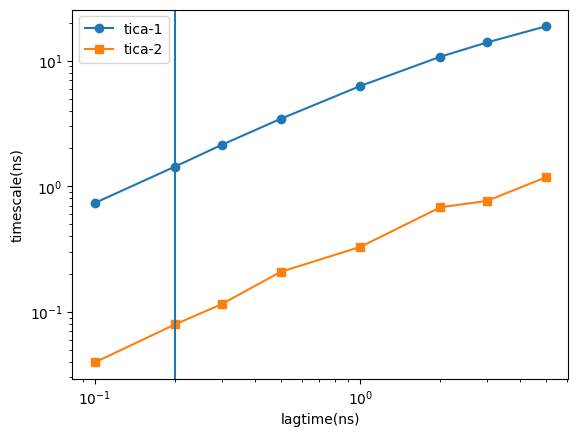

In [10]:
import pickle
exp_name = "G2-lagtime"
with open(f'calixarene/{exp_name}.pkl', 'rb') as f:
    its_list = pickle.load(f)

# print lag, t1, t2 for each lag time
for i in range(len(its_list['lag'])):
    print(its_list['lag'][i],its_list['t1'][i],its_list['t2'][i])
plt.plot(np.asarray(its_list['lag'])/1000,its_list['t1'],label='tica-1',marker='o')
plt.plot(np.asarray(its_list['lag'])/1000,its_list['t2'],label='tica-2',marker='s')
plt.xlabel('lagtime(ns)')
plt.ylabel('timescale(ns)')
plt.xscale('log')
plt.yscale('log')
plt.axvline(0.2)
plt.legend()
plt.show()

#### G2 (replicas, trajs)

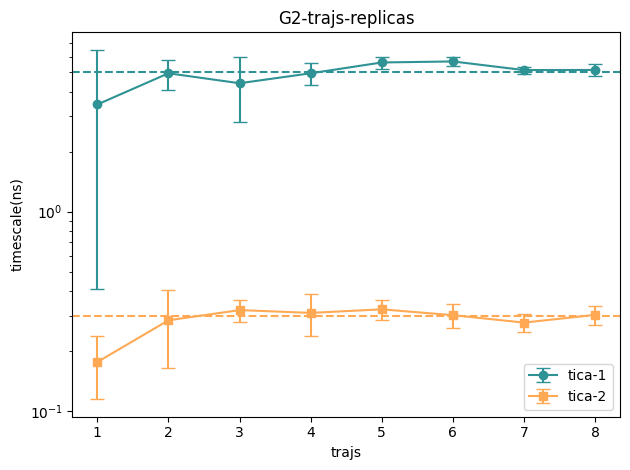

In [11]:
import pandas as pd

# Load
import pickle
exp_name = "G2-trajs-replicas"
with open(f'calixarene/{exp_name}.pkl', 'rb') as f:
    its_list = pickle.load(f)

# Convert to DataFrame
df = pd.DataFrame(its_list)

# Group by 'trajs' and calculate mean and std for 't1' and 't2'
stats = df.groupby('trajs').agg(['mean', 'std'])

# Plot
fig, ax = plt.subplots()

x = stats.index
t1_means = stats['t1']['mean']
t1_stds = stats['t1']['std']
t2_means = stats['t2']['mean']
t2_stds = stats['t2']['std']

# Plot with error bars
ax.errorbar(x, t1_means, yerr=t1_stds, fmt='o-', capsize=5, color='fessa1',label='tica-1')
ax.errorbar(x, t2_means, yerr=t2_stds, fmt='s-', capsize=5, color='fessa5',label='tica-2')

plt.axhline(0.3,linestyle='--',color='fessa5')
plt.axhline(5.,linestyle='--',color='fessa1')

# Customize plot
ax.set_title(exp_name)
ax.set_xlabel('trajs')
ax.set_ylabel('timescale(ns)')
ax.set_yscale('log')
ax.legend()

plt.tight_layout()
plt.show()

## COLVAR

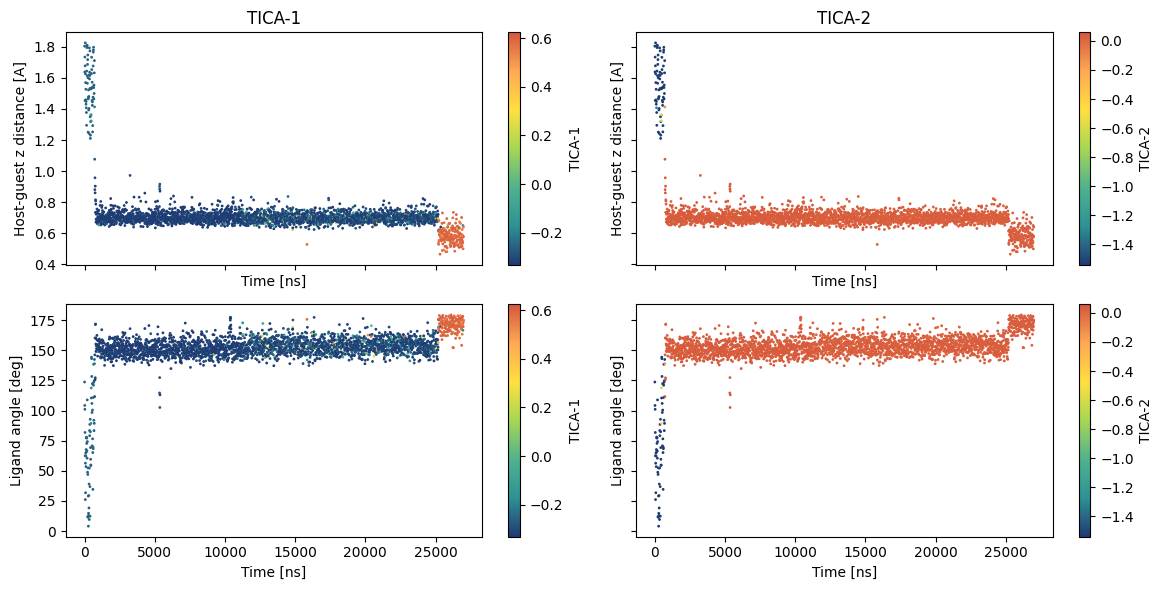

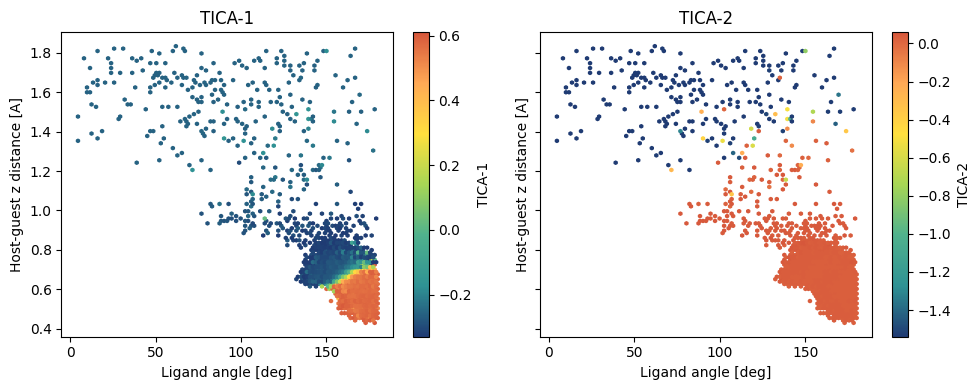

In [361]:
fg, axs = plt.subplots(2,2,figsize=(12,6),sharex=True,sharey='row') 

df_sel = df.dropna(subset=['TICA-1','TICA-2'])
df_sel = df_sel[df_sel['walker']==6]

labels = {'cyl.z' : 'Host-guest z distance [A]',
          'ang_deg' : 'Ligand angle [deg]',
          'TICA-1' : 'TICA-1',
          'TICA-2' : 'TICA-2'}

rows = ['cyl.z','ang_deg']
cols = ['TICA-1','TICA-2']

for i, row in enumerate(rows):
    for j, col in enumerate(cols):
        ax = axs[i][j]
        pp = ax.scatter(df_sel['time'],df_sel[row],c=df_sel[col],cmap='fessa',s=1)
        cbar = plt.colorbar(pp,ax=ax)
        cbar.set_label(col)
        ax.set_xlabel('Time [ns]')
        ax.set_ylabel(labels[row])
        if i == 0:
            ax.set_title(col)

plt.tight_layout()

fg, axs = plt.subplots(1,2,figsize=(10,4),sharex=True,sharey=True) 
# scatter 'ang_deg' vs 'cyl.z' coloring by 'TICA-1' and 'TICA-2' in the two subplots

df_sel = df.dropna(subset=['TICA-1','TICA-2'])

for i, col in enumerate(cols):
    ax = axs[i]
    pp = ax.hexbin(df_sel['ang_deg'],df_sel['cyl.z'],C=df_sel[col],cmap='fessa')
    cbar = plt.colorbar(pp,ax=ax)
    cbar.set_label(col)
    ax.set_ylabel(labels['cyl.z'])
    ax.set_xlabel(labels['ang_deg'])
    ax.set_title(col)

plt.tight_layout()

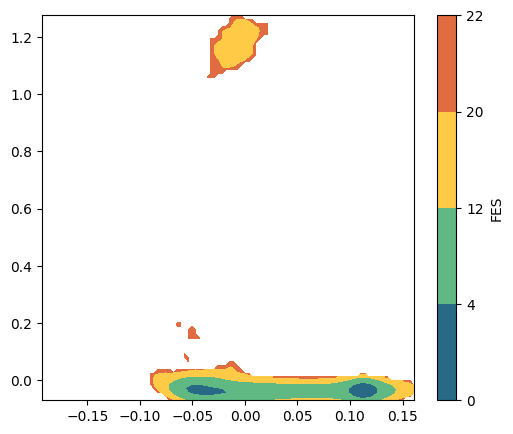

In [225]:
from mlcolvar.utils.fes import compute_fes
fig,ax = plt.subplots(1,1,figsize=(6,5),dpi=100)
max_fes = 22
# compute cvs
df_sel = df.dropna(subset=['TICA-1','TICA-2'])
s = df_sel[['TICA-1','TICA-2']].values  

fes,grid,bounds,error = compute_fes(s,
    blocks=1,
    bandwidth=0.01, scale_by='range',
    plot=False, plot_max_fes=200, ax = ax, eps=1e-10)

fes2 = fes.copy()
if max_fes is not None:
    fes2[fes2 > max_fes] = np.nan
extent = [item for sublist in bounds for item in sublist]
pp = ax.contourf(fes2, levels=[0,4,12,20,22], cmap="fessa", extent=extent)  # ,vmax=max_fes)
cbar = plt.colorbar(pp, ax=ax)
cbar.set_label("FES")


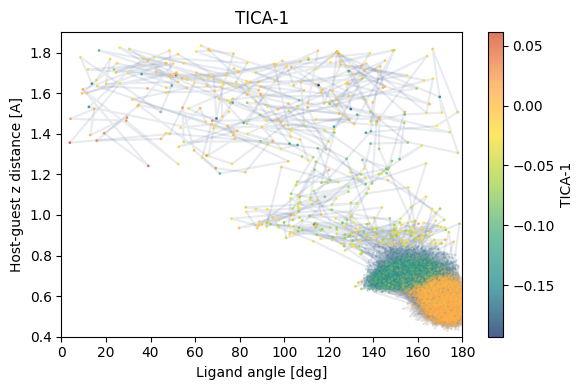

In [226]:
fg, axs = plt.subplots(1,1,figsize=(6,4),sharex=True,sharey=True) 
# scatter 'ang_deg' vs 'cyl.z' coloring by 'TICA-1' and 'TICA-2' in the two subplots

df_sel = df.dropna(subset=['TICA-1','TICA-2'])

cols = ['TICA-1']
if len(cols) ==1:
    axs = [axs]

for i, col in enumerate(cols):
    ax = axs[i]
    for walker in range(10):
        mask = df_sel['walker'] == walker
        pp = ax.plot(df_sel[mask]['ang_deg'],df_sel[mask]['cyl.z'],alpha=0.1,c='fessa0')#,c=df_sel[mask][col],cmap='fessa')

    # filter only rows which TICA-2 > 0.2   
    # mask = df_sel['TICA-2'] < 0.15
    # df_sel2 = df_sel[mask]
    # pp = ax.scatter(df_sel2['ang_deg'],df_sel2['cyl.z'],c=df_sel2[col],cmap='fessa',s=0.01,alpha=0.5,zorder=10)

    # mask = df_sel['TICA-2'] >= 0.15
    # df_sel2 = df_sel[mask]
    # pp = ax.scatter(df_sel2['ang_deg'],df_sel2['cyl.z'],c=df_sel2[col],cmap='fessa',s=1,alpha=1,zorder=10)

    mask = (df_sel['ang_deg'] > 135) & (df_sel['cyl.z'] < 0.85 ) 

    df_sel2 = df_sel[mask]
    ax.scatter(df_sel2['ang_deg'],df_sel2['cyl.z'],c=df_sel2['TICA-1'],cmap='fessa',s=0.05,alpha=0.5,zorder=10,vmin=df_sel2['TICA-1'].min(),vmax=df_sel2['TICA-1'].max())

    df_sel2 = df_sel[~mask]
    pp = ax.scatter(df_sel2['ang_deg'],df_sel2['cyl.z'],c=df_sel2['TICA-1'],cmap='fessa',s=1,alpha=0.8,zorder=10, vmin=df_sel2['TICA-1'].min(),vmax=df_sel2['TICA-1'].max())

    cbar = plt.colorbar(pp,ax=ax)
    cbar.set_label(col)
    ax.set_ylabel(labels['cyl.z'])
    ax.set_xlabel(labels['ang_deg'])
    ax.set_xlim(0,180)
    ax.set_ylim(0.4,1.9)
    ax.set_title(col)

plt.tight_layout()

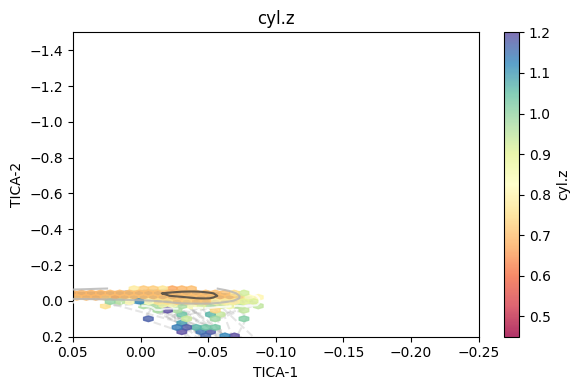

In [227]:
fg, ax = plt.subplots(1,1,figsize=(6,4),sharex=True,sharey=True) 

# FES
df_sel = df.dropna(subset=['TICA-1','TICA-2'])
s = df_sel[['TICA-1','TICA-2']].values  

fes,grid,bounds,error = compute_fes(s,
    blocks=1,
    bandwidth=0.01, scale_by='range',
    plot=False, plot_max_fes=200, ax = ax, eps=1e-12)

fes2 = fes.copy()
max_fes = 22
if max_fes is not None:
    fes2[fes2 > max_fes] = np.nan
extent = [item for sublist in bounds for item in sublist]
ax.contour(fes2, levels=[0,4,12,20], cmap="Greys_r", extent=extent,zorder=20,alpha=0.8)  # ,vmax=max_fes)
#cbar = plt.colorbar(pp, ax=ax)
#cbar.set_label("FES")


# scatter 'ang_deg' vs 'cyl.z' coloring by 'TICA-1' and 'TICA-2' in the two subplots

df_sel = df.dropna(subset=['TICA-1','TICA-2'])

cols = ['cyl.z']

for i, col in enumerate(cols):
    for walker in range(10):
        mask = df_sel['walker'] == walker
        pp = ax.plot(df_sel[mask]['TICA-1'],df_sel[mask]['TICA-2'],alpha=0.2,c='grey', linestyle= '--',zorder=-1) #,c=df_sel[mask][col],cmap='fessa')

    pp = ax.hexbin(df_sel['TICA-1'],df_sel['TICA-2'],C=df_sel['cyl.z'],cmap='Spectral', alpha=0.8,zorder=0, vmin=0.45,vmax=1.2, gridsize=50)#, vmin=df_sel2['cyl.z'].min(),vmax=df_sel2['cyl.z'].max())

    cbar = plt.colorbar(pp,ax=ax)
    cbar.set_label(col)
    ax.set_ylabel(labels['TICA-2'])
    ax.set_xlabel(labels['TICA-1'])
    ax.set_xlim(0.05,-0.25)
    ax.set_ylim(0.2,-1.5)
    ax.set_title(col)

plt.tight_layout()

#### Comparison

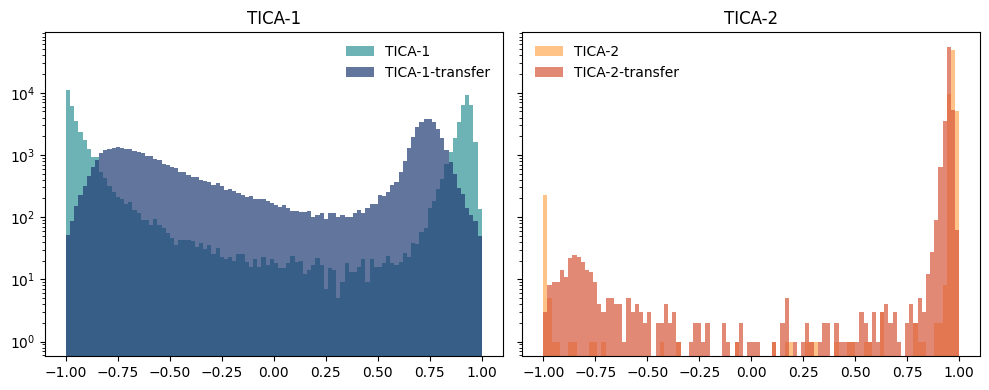

In [423]:
fg, axs = plt.subplots(1,2,figsize=(10,4),sharex=False,sharey=True) 

df_sel = df.dropna(subset=['TICA-1','TICA-2'])

cols = ['TICA-1','TICA-2']
normalize = True

for i, col in enumerate(cols):
    ax = axs[i]
    # normalize the values between 0 and 1 
    if i == 1:
        y = df_sel[col]
    else :
        y = df_sel[col]
    if normalize:
        y = 2 * (y - y.min()) / (y.max() - y.min()) - 1
    pp = ax.hist(y,bins=100, label=col,alpha=0.7, color= 'fessa1' if i == 0 else 'fessa5')
    ax.set_title(col)

cols = ['TICA-1-transfer','TICA-2-transfer']

for i, col in enumerate(cols):
    ax = axs[i]
    
    if i == 1:
        y = df_sel[col]*-1
    else :
        mask = (df_sel[col]>-0.07) & (df_sel[col]<0.14)
        y = df_sel[mask][col]
    if normalize:
        y = 2 * (y - y.min()) / (y.max() - y.min()) - 1

    pp = ax.hist(y,bins=100, label=col,alpha=0.7, color= 'fessa0' if i == 0 else 'fessa6')
    ax.set_yscale('log')
    ax.legend(frameon=False)

plt.tight_layout()

-1.0 1.0
-1.0 1.0
0
1


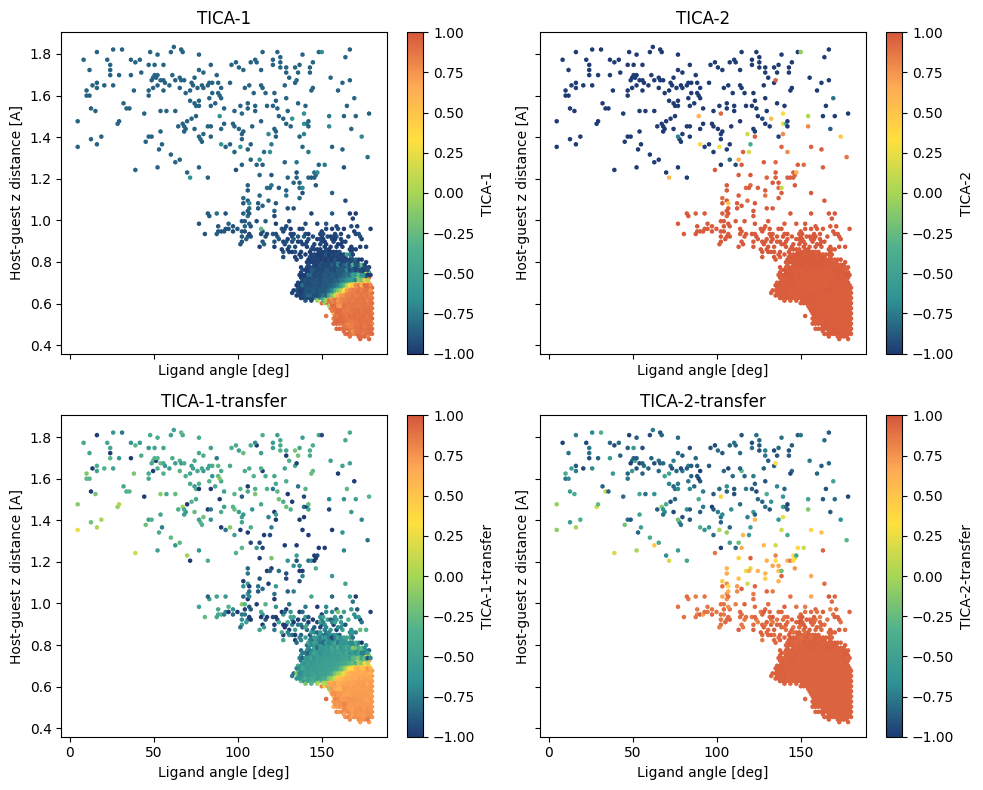

In [431]:
fg, axs = plt.subplots(2,2,figsize=(10,8),sharex=True,sharey=True) 

normalize = True

df_sel = df.dropna(subset=['TICA-1','TICA-2'])

cols = ['TICA-1','TICA-2']
sign = [1,1]

for i, col in enumerate(cols):
    ax = axs[0][i]
    y = df_sel[col]*sign[i]
    if normalize:
        y = 2 * (y - y.min()) / (y.max() - y.min()) - 1
        print(y.min(),y.max())
    pp = ax.hexbin(df_sel['ang_deg'],df_sel['cyl.z'],C=y,vmin=-1,vmax=1,cmap='fessa',label=col)
    cbar = plt.colorbar(pp,ax=ax)
    cbar.set_label(col)
    ax.set_ylabel(labels['cyl.z'])
    ax.set_xlabel(labels['ang_deg'])
    ax.set_title(col)

cols = ['TICA-1-transfer','TICA-2-transfer']
sign = [1,-1]

for i, col in enumerate(cols):
    print(i)
    ax = axs[1][i]
    if i == 0:
        mask = (df_sel[col]>-0.07) & (df_sel[col]<0.14)
        y = df_sel[col]*sign[i]
        y2 = df_sel[mask][col]*sign[i]
    else:
        y = df_sel[col]*sign[i]
        y2 = y

    if normalize:
        y = 2 * (y - y2.min()) / (y2.max() - y2.min()) - 1
    pp = ax.hexbin(df_sel['ang_deg'],df_sel['cyl.z'],C=y,cmap='fessa',vmin=-1,vmax=1,label=col)
    cbar = plt.colorbar(pp,ax=ax)
    cbar.set_label(col)
    ax.set_ylabel(labels['cyl.z'])
    ax.set_xlabel(labels['ang_deg'])
    ax.set_title(col)

plt.tight_layout()

/tmp/ipykernel_2884976/128716017.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


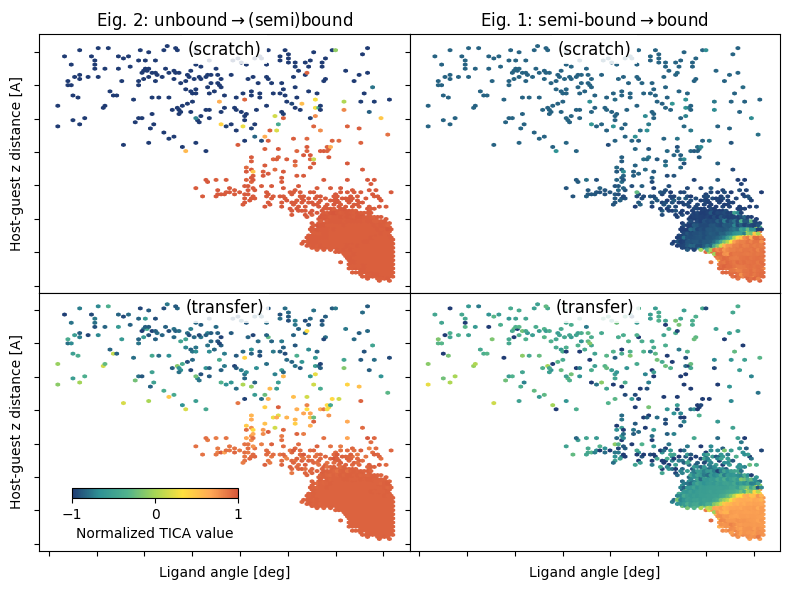

In [35]:
import matplotlib.pyplot as plt

labels = {'cyl.z' : 'Host-guest z distance [A]',
          'ang_deg' : 'Ligand angle [deg]',
          'TICA-1' : '(scratch)',
          'TICA-2' : '(scratch)',
          'TICA-1-transfer' : '(transfer)',
          'TICA-2-transfer' : '(transfer)'}

titles = {'TICA-1': r'Eig. 1: semi-bound$\rightarrow$bound',
          'TICA-2': r'Eig. 2: unbound$\rightarrow$(semi)bound' }

fg, axs = plt.subplots(2, 2, figsize=(8, 6), sharex=True, sharey=True,
                       gridspec_kw={"wspace": 0, "hspace": 0})

normalize = True
df_sel = df.dropna(subset=['TICA-1', 'TICA-2'])

cols = ['TICA-2','TICA-1']
sign = [1, 1]
hexplots = []

for i, col in enumerate(cols):
    ax = axs[0][i]
    y = df_sel[col] * sign[i]
    if normalize:
        y = 2 * (y - y.min()) / (y.max() - y.min()) - 1
    pp = ax.hexbin(df_sel['ang_deg'], df_sel['cyl.z'], C=y, vmin=-1, vmax=1, cmap='fessa',label= labels[col])
    hexplots.append(pp)
    
    if i == 0:
        ax.set_ylabel(labels['cyl.z'])
    if i == 1:
        ax.set_yticklabels([])  # Hide inner Y ticks
    ax.set_xticklabels([])      # Hide top row X ticks
    ax.set_title(titles[col])
    # add a legend with no border but filled with white color and remove the marker 
    #ax.legend(frameon=True,facecolor='white',edgecolor='none',loc='upper left')
    # add a text on the upper center of the plot on a white box
    ax.text(0.5, 0.94, labels[col], transform=ax.transAxes, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='none', alpha=0.85),fontsize=12)

cols = ['TICA-2-transfer', 'TICA-1-transfer']
sign = [-1, 1]

for i, col in enumerate(cols):
    ax = axs[1][i]
    if col == 'TICA-1-transfer':
        mask = (df_sel[col] > -0.07) & (df_sel[col] < 0.14)
        y = df_sel[col] * sign[i]
        y2 = df_sel[mask][col] * sign[i]
    else:
        y = df_sel[col] * sign[i]
        y2 = y

    if normalize:
        y = 2 * (y - y2.min()) / (y2.max() - y2.min()) - 1
    pp = ax.hexbin(df_sel['ang_deg'], df_sel['cyl.z'], C=y, cmap='fessa', vmin=-1, vmax=1,label= labels[col])
    hexplots.append(pp)

    if i == 0:
        ax.set_ylabel(labels['cyl.z'])
    else:
        ax.set_yticklabels([])

    ax.set_xlabel(labels['ang_deg'])
    ax.text(0.5, 0.94, labels[col], transform=ax.transAxes, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='none', alpha=0.85),fontsize=12)

# Add a single colorbar to the right of all subplots
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#cbar = fg.colorbar(hexplots[0], ax=axs, orientation='horizontal', fraction=0.02, pad=0.02)
ax_cb = inset_axes(
    axs[1, 0],
    width="45%",        # 50% of the parent axis width
    height="4%",        # 5% of the parent axis height
    loc='lower left',   # anchored to the lower left corner
    bbox_to_anchor=(0.05, 0.15, 1, 1),  # full axes bbox as reference
    bbox_transform=axs[1, 0].transAxes,
    borderpad=1         # padding inside the axes
)

cbar = fg.colorbar(hexplots[2], cax=ax_cb, orientation='horizontal')
cbar.set_label("Normalized TICA value")

plt.tight_layout()
plt.show()


In [21]:
df = pd.read_csv('COLVAR_G2_WITH_TICA.csv',index_col=0)

df

,time,@3,cyl.x,cyl.y,cyl.z,radius,funnel,funnelwall.bias,funnelwall.force2,upper_wall.bias,upper_wall.force2,ang,cosang,walker,ang_deg,TICA-1,TICA-2,TICA-1-transfer,TICA-2-transfer
0,0.0,0.0212,-0.6228,0.1409,1.8035,0.6386,0.4386,384.7213,3.077770e+06,0.0499,799.1801,2.1593,-0.5551,0,123.718777,-0.258114,-1.537376,-0.032767,1.111633
1,10.0,0.0146,-0.0652,-0.1821,1.6937,0.1934,-0.0066,0.0000,0.000000e+00,0.0000,0.0000,2.2792,-0.6506,0,130.588541,-0.259255,-1.538749,-0.003086,1.175197
2,20.0,0.0165,-0.0049,-0.1908,1.4590,0.1909,-0.0091,0.0000,0.000000e+00,0.0000,0.0000,2.4698,-0.7827,0,141.509116,-0.207403,-1.014161,-0.083171,1.130071
3,30.0,0.0183,0.1428,0.0985,1.7830,0.1735,-0.0265,0.0000,0.000000e+00,0.0000,0.0000,2.8652,-0.9621,0,164.163867,-0.258171,-1.537473,-0.011335,1.153291
4,40.0,0.0195,-0.0992,-0.1938,1.5554,0.2177,0.0177,0.6249,4.999305e+03,0.0000,0.0000,2.1040,-0.5083,0,120.550320,-0.257887,-1.537436,-0.008644,1.263750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64609,99960.0,0.0197,0.0470,-0.0223,0.6386,0.0520,-0.5094,0.0000,0.000000e+00,0.0000,0.0000,2.8372,-0.9540,9,162.559586,NaN,NaN,NaN,NaN
64610,99970.0,0.0160,0.0382,0.0077,0.5667,0.0390,-0.5943,0.0000,0.000000e+00,0.0000,0.0000,3.0124,-0.9917,9,172.597806,NaN,NaN,NaN,NaN
64611,99980.0,0.0170,-0.0166,0.0208,0.5435,0.0267,-0.6299,0.0000,0.000000e+00,0.0000,0.0000,3.0408,-0.9949,9,174.225006,NaN,NaN,NaN,NaN
64612,99990.0,0.0158,-0.0054,-0.0211,0.5997,0.0218,-0.5785,0.0000,0.000000e+00,0.0000,0.0000,3.0955,-0.9989,9,177.359085,NaN,NaN,NaN,NaN


In [432]:
df.to_csv('COLVAR_G2_WITH_TICA.csv')

<Axes: xlabel='time'>

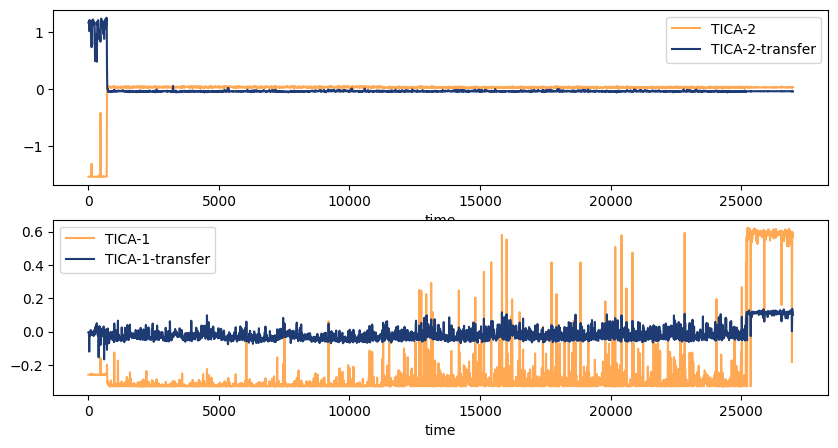

In [34]:
# define 2 supplots
fig, axs = plt.subplots(2,1, figsize=(10, 5))

ax = axs[0]
df[df['walker']==6].plot('time','TICA-2',ax=ax, color='fessa5')
df[df['walker']==6].plot('time','TICA-2-transfer',ax=ax, color='fessa0')

ax = axs[1]
df[df['walker']==6].plot('time','TICA-1',ax=ax, color='fessa5')
df[df['walker']==6].plot('time','TICA-1-transfer',ax=ax, color='fessa0')

<Axes: xlabel='time', ylabel='TICA-1-transfer'>

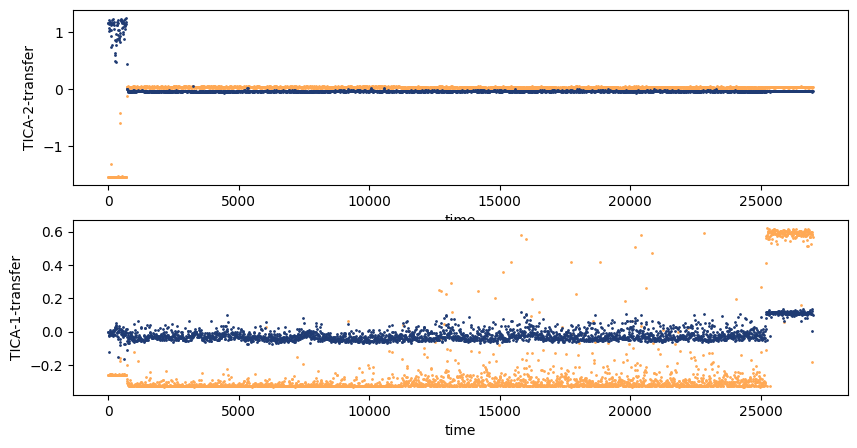

In [33]:
# define 2 supplots
fig, axs = plt.subplots(2,1, figsize=(10, 5))

ax = axs[0]
df[df['walker']==6].plot.scatter('time','TICA-2',ax=ax, color='fessa5',s=1)
df[df['walker']==6].plot.scatter('time','TICA-2-transfer',ax=ax, color='fessa0',s=1)

ax = axs[1]
df[df['walker']==6].plot.scatter('time','TICA-1',ax=ax, color='fessa5',s=1)
df[df['walker']==6].plot.scatter('time','TICA-1-transfer',ax=ax, color='fessa0',s=1)